# Part 1 - Warm-up

## Task 1
The first task consists of fitting the following logarithmic equation to a set of 50 (x,y) data points: $ y=a⋅log(x)+b $

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### Load and plot the data

In [2]:
df = pd.read_csv("p3_task-1.csv")
print("The shape of the dataframe is :",df.shape)
df.head()

The shape of the dataframe is : (50, 2)


,x,y
0,10.529,39.105
1,10.799,40.584
2,11.698,39.883
3,12.851,39.411
4,13.565,40.760


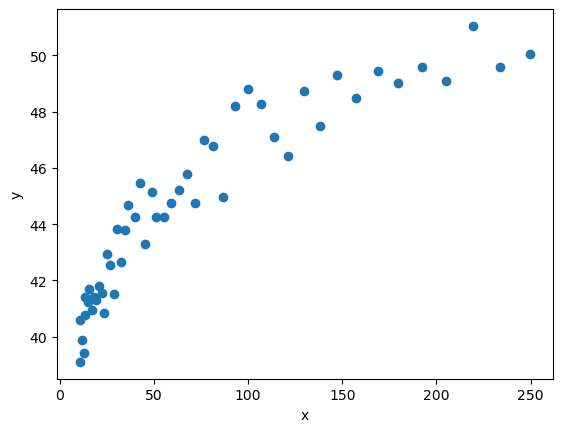

In [3]:
y = df.y.values
x = df.x.values

plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel('y')
plt.show()

### Define a new variable log(x) and transform the data.

In [4]:
# Fit a polynomial
coefs = np.polyfit(np.log(x), y, deg=1)
print("Coefficients:",coefs)

Coefficients: [ 3.390241   31.52920122]


### Fit a model to the new data

In [5]:
# Generate a hundred values between min(x) and max(x)
x_values = np.linspace(x.min(), x.max(), num=50)

# Predict y values
y_values = np.polyval(coefs, np.log(x_values))

### Plot the logarithmic curve against the original data.

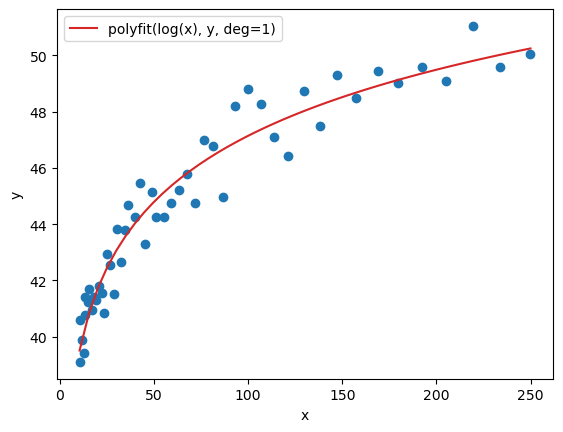

In [6]:
# Plot curve
plt.scatter(x, y)
plt.plot(x_values, y_values, c='C3', label='polyfit(log(x), y, deg=1)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Compute the RSS and R2 measures.

In [7]:
def RSS(y, y_pred):
    return np.sum(np.square(y - y_pred))

In [8]:
model_rss = RSS(y, y_values)
print("RSS value:", model_rss)

RSS value: 419.4182879958231


In [9]:
# RSS of the baseline
rss_baseline = RSS(y, y.mean())
print("RSS baseline:", rss_baseline)

RSS baseline: 541.1432872199999


In [10]:
# R^2 coefficient
R2 = 1-(model_rss / rss_baseline)
print("R^2 coefficient:", R2)

R^2 coefficient: 0.22494042169406037


In [11]:
from sklearn.metrics import r2_score
r2_score(y, y_values)

0.22494042169406037

### Discuss the results, is it a good R2 score?

Based on the chart provided, it appears that the logarithmic regression model fits the data quite well. The curve closely follows the distribution of the data points, indicating a good match between the model predictions and the observed values. However, despite the visual fit, the R-squared (R2) score remains relatively low at 0.225.

## Task 2
The second task consists of fitting a model to a set of data points that contains outliers.

- Start by using the train/test split methodology (e.g. 80-20 splits) to create a test set and keep it aside.

In [12]:
df = pd.read_csv("p3_task-2.csv")
print("The shape of the dataframe is :",df.shape)
df.head()

The shape of the dataframe is : (1000, 4)


,x1,x2,x3,y
0,7.892,318.818,162.970,2112.420
1,8.830,303.180,181.399,2096.231
2,13.811,296.231,145.849,2067.045
3,12.863,325.830,167.996,2269.262
4,13.698,254.035,171.892,1966.604


In [13]:
# Create X/y data
X = df.drop(["y"], axis=1).values
y = df.y.values

In [14]:
# Split data (80-20 splits)

from sklearn.model_selection import train_test_split

X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, train_size=0.8, test_size=0.2, random_state=0
)

- Plot the training data to get a quick overview of the data.

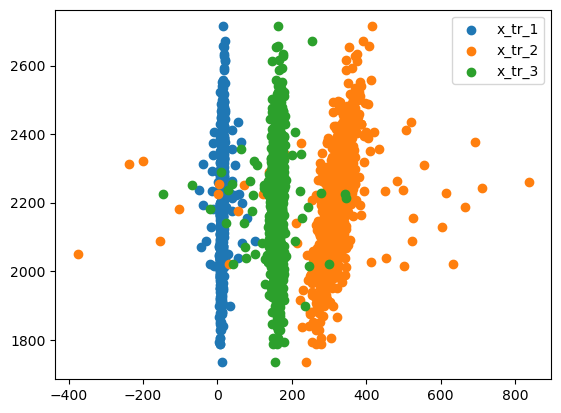

In [15]:
y = df.y.values

for i in range(3):
    plt.scatter(X_tr[:,i:i+1], y_tr, label = "x_tr_"+str(i+1))
plt.legend()
plt.show()

---

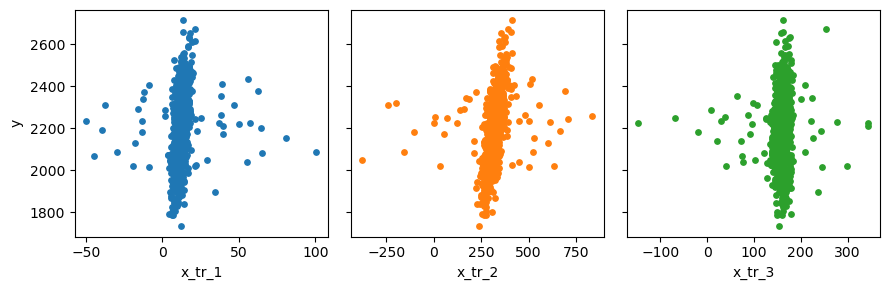

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(9, 3))

ax1.scatter(X_tr[:,0:1], y_tr, s=15, c='C0')
ax1.set_xlabel("x_tr_1")
ax1.set_ylabel("y")

ax2.scatter(X_tr[:,1:2], y_tr, s=15, c='C1')
ax2.set_xlabel("x_tr_2")

ax3.scatter(X_tr[:,2:3], y_tr, s=15, c='C2')
ax3.set_xlabel("x_tr_3")

plt.tight_layout()
plt.show()

The first plot displays three groups of points, namely x1, x2, and x3. It appears that x3 is wider than x2 and x1. Additionally, the groups seem to overlap with each other.

Moving on to the second plot, it is evident that all three groups contain outliers.

### Build and apply a cleaning strategy to remove outliers from the training data.

I have opted to utilize the z-score method to eliminate outliers from the dataset. 

Although I could have manually removed the outliers as they are noticeably distinct from the mean.

In [17]:
x1_tr = X_tr[:,0:1]
x2_tr = X_tr[:,1:2]
x3_tr = X_tr[:,2:3]

# Compute z-scores
z_scores_1 = (x1_tr - x1_tr.mean()) / x1_tr.std()
z_scores_2 = (x2_tr - x2_tr.mean()) / x2_tr.std()
z_scores_3 = (x3_tr - x3_tr.mean()) / x3_tr.std()

In [18]:
# Select outliers
tol = 2

idx1 = np.squeeze(np.abs(z_scores_1) > tol)
idx2 = np.squeeze(np.abs(z_scores_2) > tol)
idx3 = np.squeeze(np.abs(z_scores_3) > tol)

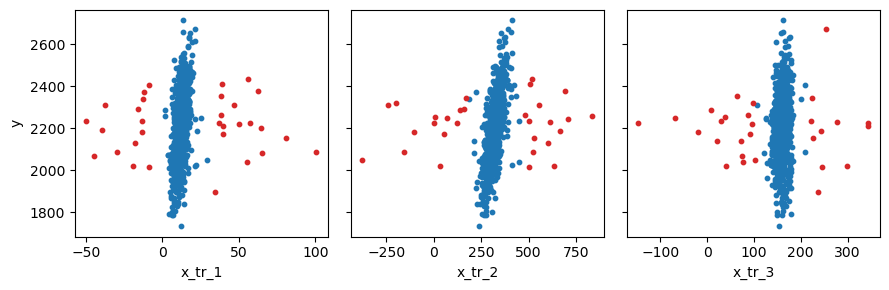

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(9, 3))

ax1.scatter(x1_tr[~idx1], y_tr[~idx1], s=10, c='C0')
ax1.scatter(x1_tr[idx1], y_tr[idx1], s=10, c="C3")
ax1.set_xlabel("x_tr_1")
ax1.set_ylabel("y")

ax2.scatter(x2_tr[~idx2], y_tr[~idx2], s=10, c='C0')
ax2.scatter(x2_tr[idx2], y_tr[idx2], s=10, c="C3")
ax2.set_xlabel("x_tr_2")

ax3.scatter(x3_tr[~idx3], y_tr[~idx3], s=10, c='C0')
ax3.scatter(x3_tr[idx3], y_tr[idx3], s=10, c="C3")
ax3.set_xlabel("x_tr_3")

plt.tight_layout()
plt.show()

The data for x1, x2, and x3 are presented in the three plots above, with the outliers highlighted in red.

- Finally compare the test MAE scores for your 3 models and comment.

In [20]:
# Compare models with mean absolute error cost function:
def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))

     - A linear regression to the data with outliers

In [21]:
from sklearn.linear_model import LinearRegression

# Linear regression to data with outliers
lr = LinearRegression()

# Fit to train data
lr.fit(X_tr, y_tr)

# Predictions for test data 
y_pred_lr = np.maximum(
    lr.predict(X_te), 50  
)

# Compute MAE
mae_lr = MAE(y_te, y_pred_lr)
print("MAE linear regression: {:.3f}".format(mae_lr))

MAE linear regression: 104.788


    - A huber regression to the data with outliers

In [22]:
from sklearn.linear_model import HuberRegressor

# Huber loss
huber = HuberRegressor(epsilon=1.2)

# Fit to train data
huber.fit(X_tr, y_tr)  

# Predictions for test data 
y_pred_huber = np.maximum(
    huber.predict(X_te), 50  # set a lower limit
)

mae_huber = MAE(y_te, y_pred_huber)
print("MAE Huber: {:.3f}".format(mae_huber))

MAE Huber: 78.719


    - A linear regression to the data without outliers

In [23]:
# Remove outliers from X / y and check the shape of them 

X_tr_wo = X_tr[~(idx1 + idx2 + idx3)]
y_tr_wo = y_tr[~(idx1 + idx2 + idx3)]
print(X_tr_wo.shape)
print(y_tr_wo.shape)

(755, 3)
(755,)


In [24]:
# Fit to train data
lr.fit(X_tr_wo, y_tr_wo)

# Predictions for test data
y_pred_lr = np.maximum(
    lr.predict(X_te), 50
)

# Compute MAE
mae_lr_wo = MAE(y_te, y_pred_lr)
print("MAE linear regression without outliers: {:.3f}".format(mae_lr_wo))

MAE linear regression without outliers: 69.303


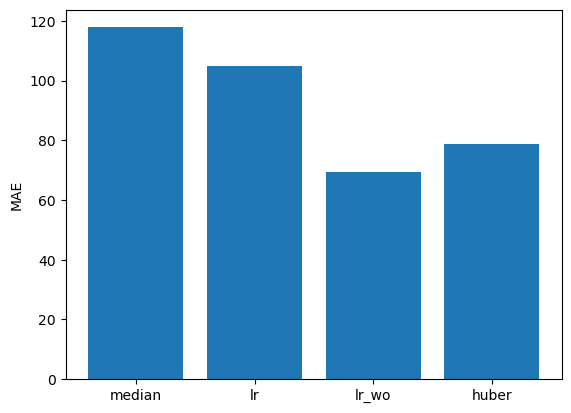

In [25]:
# Final comparison
# Baseline
mae_baseline = MAE(y_te, np.median(y_tr))

# Bar plot
mae_values = [mae_baseline, mae_lr, mae_lr_wo, mae_huber]
titles = ["median", "lr", "lr_wo", "huber"]

xcor = np.arange(len(mae_values))
plt.bar(xcor, mae_values)
plt.xticks(xcor, titles)

plt.ylabel("MAE")
plt.show()

In [26]:
print("MAE baseline: {:.0f}".format(mae_baseline))
print("MAE linear regression: {:.0f}".format(mae_lr))
print("MAE Huber: {:.0f}".format(mae_huber))
print("MAE linear regression without outliers: {:.0f}".format(mae_lr_wo))

MAE baseline: 118
MAE linear regression: 105
MAE Huber: 79
MAE linear regression without outliers: 69


Although all models perform better than the mean baseline, it is worth noting that the linear regression model is only slightly better than the baseline. The Huber regression and linear regression without outliers, on the other hand, are the top-performing models.